## **Time Series Analysis with Python**

### **Description:**

This repository contains a Jupyter Notebook that demonstrates a basic time series analysis using Python. Key features of this analysis are:


1.   **Data Loading:** Imports data from Google Drive and reads it into a Pandas DataFrame.
2.   **Data Reshaping:** Transforms a wide DataFrame to a long format using the melt function. This transformation makes it easier to analyze time series data for multiple SKUs (stock-keeping units).
3.   **Data Cleaning:** Removes any redundant rows where the SKU column is labeled as 'index'.





In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Step 1: Data Loading

df_all = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Medium/1. Time Series/EP11.xlsx')
df_all

,date,A,B,C
0,2000-01-31,29,59,19
1,2000-02-29,30,62,24
2,2000-03-31,31,61,24
3,2000-04-30,31,60,23
4,2000-05-31,29,60,20
...,...,...,...,...
271,2022-08-31,57,23,25
272,2022-09-30,54,25,25
273,2022-10-31,59,24,26
274,2022-11-30,59,26,28


In [4]:
# Step 2: Data Reshaping

# Unpivot the DataFrame
df = df_all.reset_index().melt(id_vars='date', var_name='sku', value_name='value')

# Step 3: Data Cleaning

# Remove the rows where sku is equal to "index"
df = df[df['sku'] != 'index']
df

,date,sku,value
276,2000-01-31,A,29
277,2000-02-29,A,30
278,2000-03-31,A,31
279,2000-04-30,A,31
280,2000-05-31,A,29
...,...,...,...
1099,2022-08-31,C,25
1100,2022-09-30,C,25
1101,2022-10-31,C,26
1102,2022-11-30,C,28


# Line plot

The Line Plot is an essential tool in time series analysis, especially for understanding trends, outliers, and patterns over time. In this demonstration, the line plot illustrates how the values of different SKUs change across various dates. By visualizing this data in a time series format, one can quickly discern potential seasonality, fluctuations, or significant shifts in SKU values.

***Sample Visualization:***

1. ***X-Axis (x):*** Represents the date column of the DataFrame. It acts as the independent variable showcasing the chronological progression of time. As a result, one can observe how SKU values vary as time progresses.
2. ***Y-Axis (y):*** Denotes the value column of the DataFrame. It is the dependent variable, showcasing the actual values of the SKUs on the corresponding dates. The magnitude of these values on the Y-axis allows for direct comparison between different time points or between different SKUs.
3. ***Legend (color):*** The legend is determined by the sku column, which contains unique identifiers for different SKUs. By coloring the lines according to the SKU, the visualization effectively differentiates between the various product categories. Users can easily discern which line corresponds to which SKU, enabling a clearer understanding of individual SKU trends.

The Line Plot's design ensures that viewers can rapidly grasp the overarching patterns and pinpoint any deviations or anomalies, which can be invaluable for data-driven decision-making processes.



In [5]:
fig = px.line(df, x="date", y="value", color="sku")
fig.show()

# Box plot

The Box Plot (also known as a Whisker Plot) is a standardized way of visualizing the distribution of data based on a five-number summary: the minimum, first quartile (Q1), median (Q2 or Q3), third quartile (Q3 or Q4), and maximum. In the context of the provided code, the box plot is utilized to understand the year-wise distribution of SKU values. This visualization is especially effective in identifying outliers, understanding dispersion, and comparing the spread and skewness of different SKUs across years.

*** Visualization Settings:***
1. ***X-Axis (x):*** Represents the year column extracted from the date column of the DataFrame. This axis gives a chronological display of the years, enabling viewers to observe the year-to-year variation in SKU values.
2. ***Y-Axis (y):*** Represents the value column of the DataFrame, indicating the SKU values for respective years. The Y-axis displays the range and distribution of these values, encapsulating the spread and potential outliers within the dataset.
3. ***Color / Grouping (color):*** The box plots are colored and grouped based on the sku column. Each SKU gets its own set of colored box plots, one for each year. This categorization enables users to compare the distribution of values for each SKU across different years.
4. ***Box Components:***
  *   Central Line: Represents the median (Q2) of the data.
  *   Edges of the Box: Represent the first quartile (Q1) and third quartile (Q3) respectively.
  * Whiskers: Extend from the edges of the box to the maximum and minimum values within a predefined range (typically 1.5 times the interquartile range).
  * Outliers: Data points outside of the whiskers' range. These can be individual points plotted separately.



The Box Plot offers a robust summary of the distribution of data. By examining the size, position, and symmetry of the boxes, as well as the length of the whiskers, one can derive insights into the variability and structure of the data, making it a valuable tool for statistical analysis.

In [6]:
# Extract year from date
df['year'] = df['date'].dt.year

# Box plot with Plotly
fig = px.box(df, x='year', y='value', color='sku')

# Set labels and title
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Value',
    title='Grouped Box Plot: SKU Value Distribution by Year'
)

# Display the plot
fig.show()

# Heatmap

A heatmap is a two-dimensional graphical representation where individual values contained in a matrix are represented as colors. It's a popular way to visualize correlations, distributions, and trends in a dense format. In the context of your code, the heatmap showcases the SKU values across months and years, providing a color-coded view of value intensities. It offers a bird's-eye view of the data, making it easier to discern patterns, anomalies, or clusters.

*** Visualization Settings: ***


1.   ***X-Axis (x):*** Represents the year column, extracted from the date column of the DataFrame. By aligning the data in a year-wise manner on the X-axis, the heatmap displays the evolution of SKU values over multiple years.
2.   ***Y-Axis (y):*** Denotes the month column, again derived from the date. This categorization allows for the observation of potential seasonality or monthly patterns in SKU values.
3.   ***Color Intensity:*** The shades or intensities of colors are determined by the value column of the DataFrame. In this particular heatmap, darker shades (towards the blue end of the 'YlGnBu' colormap) represent higher SKU values, while lighter shades signify lower values. The use of a color gradient makes it visually intuitive to identify areas of high or low value concentrations.
4.   ***Separate Heatmaps for Each SKU:*** The code generates a unique heatmap for each SKU found in the sku column, allowing for individual SKU value patterns to be discerned without overlap or clutter.

Heatmaps serve as an excellent tool for data exploration, especially when dealing with large datasets or looking to identify patterns over multiple categories or time periods. By visualizing the SKU values in such a manner, decision-makers can quickly identify seasons, months, or years of high or low activity, and subsequently make informed strategies or decisions.


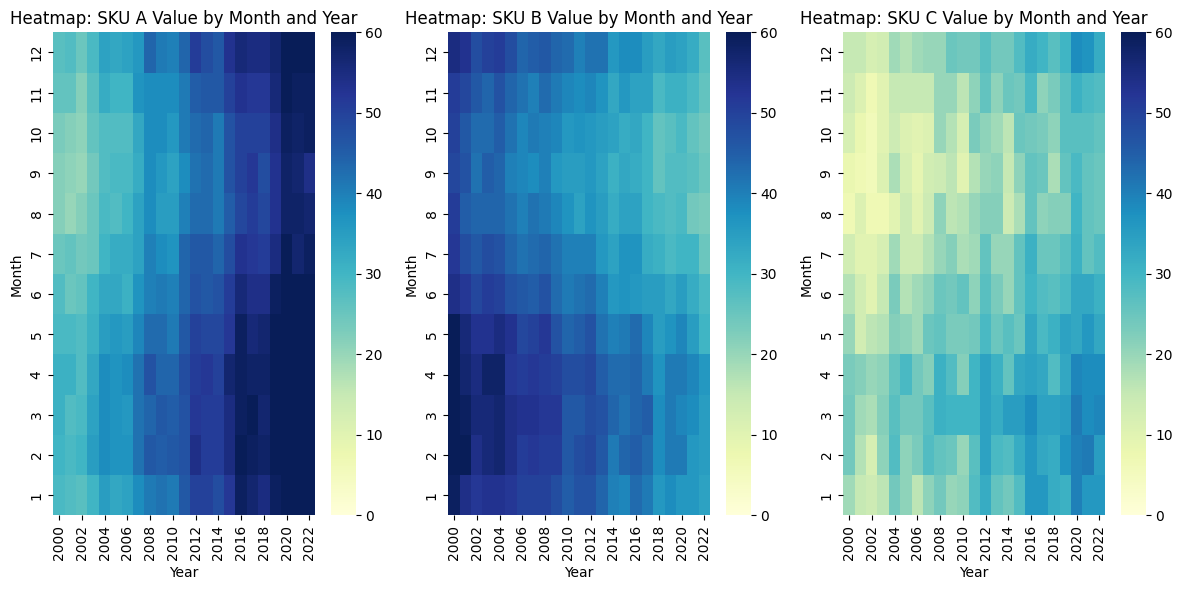

In [7]:
# Extract month from date
df['month'] = df['date'].dt.month

# Assign numeric indices to each unique SKU
sku_indices = {sku: i+1 for i, sku in enumerate(df['sku'].unique())}

# Set the figure size
plt.figure(figsize=(12, 6))

# Generate separate heatmaps for each SKU
for sku in df['sku'].unique():
    heatmap_data_sku = df[df['sku'] == sku].pivot_table(index='month', columns='year', values='value', aggfunc='sum').iloc[::-1]

    # Heatmap with seaborn
    plt.subplot(1, 3, sku_indices[sku])
    sns.heatmap(data=heatmap_data_sku, cmap='YlGnBu', annot=False, vmin=0, vmax=60)  # Set vmin and vmax

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Month')
    plt.title(f'Heatmap: SKU {sku} Value by Month and Year')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Seasonal Plots

Seasonal plots offer a mechanism to observe and compare patterns or trends that recur over specific intervals. By juxtaposing different periods side by side, these plots help in discerning the underlying seasonality in the dataset. In the context of your code, seasonal plots display the monthly distribution of SKU values across different years, making it straightforward to spot consistent patterns, fluctuations, or anomalies that recur every year.

***Visualization Settings:***
1. ***X-Axis (x):*** Represents the month column extracted from the date column of the DataFrame. It aligns the data month-wise, thus making it easier to notice any cyclic patterns or trends that occur within a year.
2. ***Y-Axis (y):*** Denotes the value column of the DataFrame, signifying the SKU values for the respective months. The magnitude of these values on the Y-axis allows for a direct comparison between different months or across different years.
3. ***Color / Grouping (hue):*** The lines in the seasonal plot are colored based on the year, making it simple to differentiate between the SKU values of various years. This feature is particularly useful to see how a particular month's SKU values have changed year on year.
4. ***Subplots for Each SKU:*** The code generates individual line plots for each SKU identified in the sku column. This separation ensures that each SKU's trends can be studied independently, without overlap or mixing, thus offering clarity.

Seasonal plots are invaluable when investigating data with potential recurring patterns. In industries like retail, finance, or agriculture, where there's a pronounced cyclical effect due to seasons, holidays, or other recurring events, these plots can offer insights that drive strategic planning and decision-making.

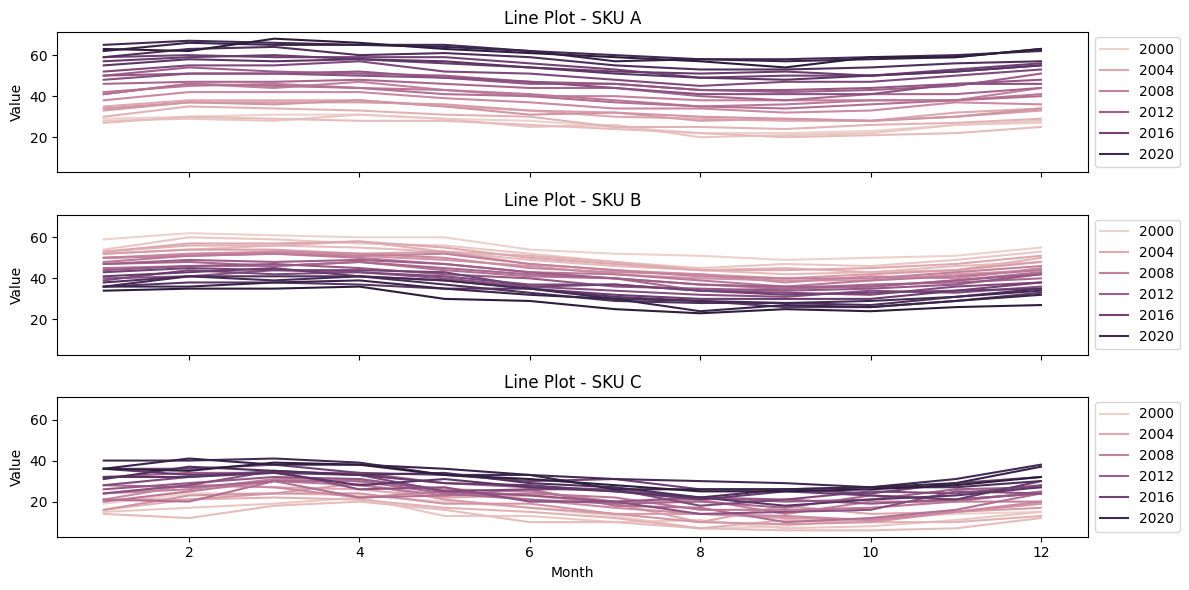

In [8]:
# Create subplots with equal sizes
fig, axes = plt.subplots(len(df['sku'].unique()), 1, figsize=(12, 6), sharex=True, sharey=True)

# Iterate over unique SKUs
for i, sku in enumerate(df['sku'].unique()):
    sku_data = df[df['sku'] == sku]

    # Line plot with seaborn on each subplot
    sns.lineplot(data=sku_data, x='month', y='value', hue='year', ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Line Plot - SKU {sku}')

    # Move the legend outside the plot
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

# Seasonal Decomposition Plot

Seasonal Decomposition of Time Series (often abbreviated as "STL") is a method to deconstruct a time series into its constituent components: trend, seasonal, and residual. The decomposition allows for a clearer understanding of the underlying patterns, trends, and anomalies in the time series data. In the context provided, the seasonal decomposition has been applied to SKU 'A' values to observe these distinct components over time.

***Visualization Settings:***
* ***X-Axis:*** Represents the combined year_month which is constructed by merging the year and month columns. This allows for a continuous timeline on which the SKU values and their decomposition components are plotted.
* ***Y-Axis:*** The magnitude of the SKU values (or their decomposed components) for the respective time periods.

The individual components of the decomposition are:
1. ***Original:***
  * This represents the original time series data (in this context, the SKU 'A' values).
  * It provides a baseline for comparison against the decomposed components.
2. Trend:
  * This captures the underlying trend in the data, which is the smooth, long-term progression of the time series.
  * Helps in understanding the general direction in which the SKU values are moving over a long period.
3. ***Seasonal:***
  * Represents the recurring patterns or cycles that are observed in the time series data at regular intervals.
  * This is especially important for spotting patterns that recur annually, quarterly, monthly, etc.
4. ***Residual:***
  * This is the remainder of the time series after the trend and seasonal components have been removed.
  * Essentially, it's the "noise" or random fluctuations in the data.
  * It can be crucial for diagnosing the goodness of fit for the decomposition and for identifying any anomalies or unexpected variations.

Seasonal Decomposition Plots are incredibly useful when analyzing time series data as they provide a comprehensive breakdown of the various driving factors behind the observed patterns. By splitting the data into trend, seasonal, and residual components, it becomes easier to make predictions, spot anomalies, or model the time series for further analysis.

In [9]:
import statsmodels.api as sm

In [10]:
# Combine 'year' and 'month' columns to create 'year_month' column
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

# Convert 'year_month' column to datetime format
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

# Filter the data for SKU 'A'
df_sku_A = df[df['sku'] == 'A'][['year_month', 'value']]
df_sku_A.set_index('year_month', inplace=True)
df_sku_A

,value
year_month,
2000-01-01,29
2000-02-01,30
2000-03-01,31
2000-04-01,31
2000-05-01,29
...,...
2022-08-01,57
2022-09-01,54
2022-10-01,59


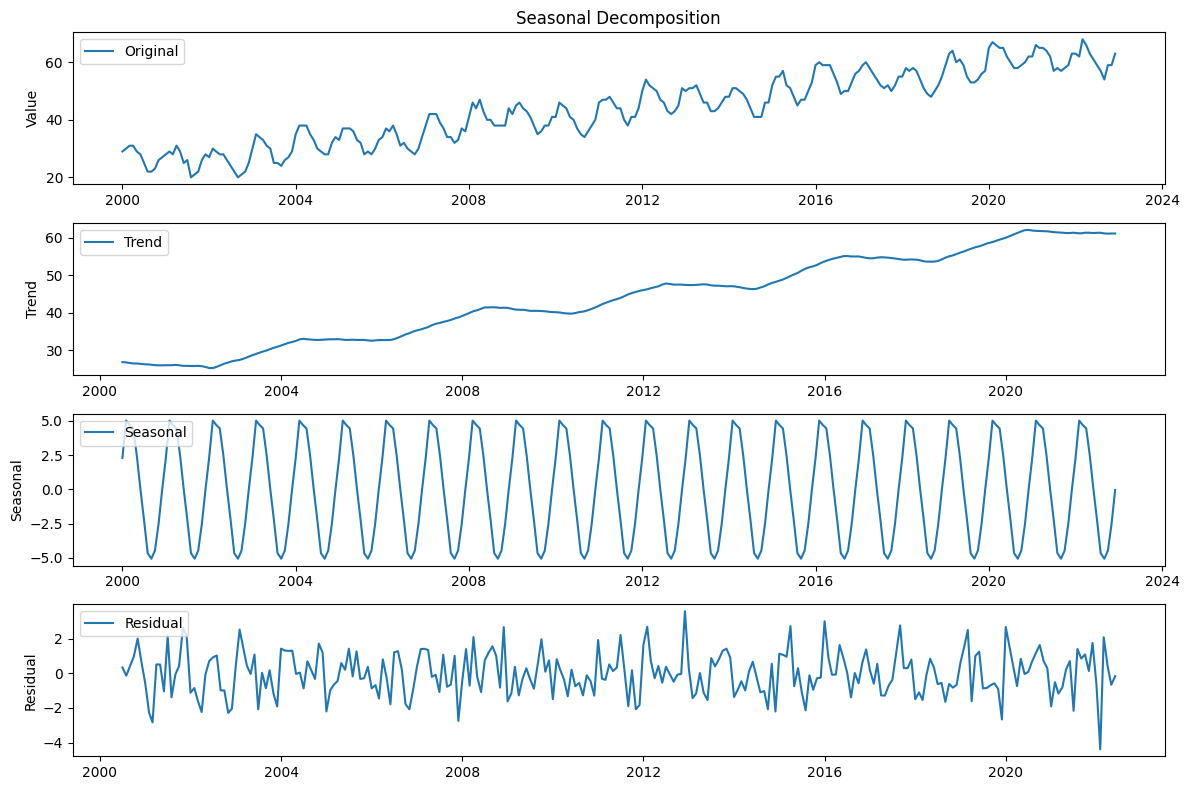

In [11]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df_sku_A['value'], model='additive')

# Plot the decomposition components
plt.subplot(4, 1, 1)
plt.plot(df_sku_A.index, df_sku_A['value'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')
plt.ylabel('Value')

plt.subplot(4, 1, 2)
plt.plot(df_sku_A.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(df_sku_A.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(df_sku_A.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.ylabel('Residual')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
